In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import numpy as np
import json
from collections import defaultdict
import seaborn as sns
from tabulate import tabulate

In [54]:
# methods = ["WSELECT1", "WSELECT2", "WSELECT3", "CDFS", "CBFS", "CSTOCH1", "CSTOCH2", "CSTOCH3", "STOCH"]
methods = ["CDFS"]
# colors=["#006BA4","#FF800E","#ABABAB","#5F9ED1","#CFCFCF","#C85200","#898989","#A2C8EC","#FFBC79"]
colors=["#006BA4","#FF800E","#A2C8EC","#C85200","#5F9ED1","#CFCFCF","#898989","#ABABAB","#FFBC79"]


df_original_0 = pd.read_csv('./src/output/gnn_eval/ml_eval_stats.csv')
df_original = df_original_0.loc[df_original_0["method"]== "CDFS"]
print(df_original)

df_original_1 = pd.read_csv('./src/output/gnn_eval/flag_eval_stats.csv')
df_original1 = df_original_1.loc[df_original_1["method"]== "CDFS"]

      iter method classifier  num_layers    split           accuracy  \
15     0.0   CDFS         wl         0.0  split_0               93.0   
16     0.0   CDFS         wl         0.0  split_1   89.8989898989899   
17     0.0   CDFS         wl         0.0  split_2               92.0   
18     0.0   CDFS         wl         0.0  split_3  92.92929292929293   
19     0.0   CDFS         wl         0.0  split_4  87.87878787878788   
...    ...    ...        ...         ...      ...                ...   
1686   3.0   CDFS     rginjk         6.0  split_3  87.75510204081633   
1687   0.0   CDFS     rginjk         6.0  split_4  86.73469387755102   
1688   1.0   CDFS     rginjk         6.0  split_4  86.73469387755102   
1689   2.0   CDFS     rginjk         6.0  split_4  86.73469387755102   
1690   3.0   CDFS     rginjk         6.0  split_4  86.73469387755102   

      balanced_accuracy  precision     recall   f1_score  
15            93.000000  92.995671  93.000000  92.673542  
16            89.

In [3]:
metrics = ["accuracy","balanced_accuracy","precision","recall","f1_score"]

In [4]:
clean_df = df_original.loc[df_original["classifier"]== "gin"]
std_data = clean_df.groupby(['classifier', 'method', 'split'])[metrics[1]].std()

print(std_data)

classifier  method  split  
gin         CDFS    split_0    4.038418
                    split_1    2.549812
                    split_2    3.143621
                    split_3    3.532066
                    split_4    2.188905
Name: balanced_accuracy, dtype: float64


In [5]:
clean_df = df_original.loc[df_original["classifier"]== "ginjk"]
std_data = clean_df.groupby(['classifier', 'method', 'split'])[metrics[1]].std()

print(std_data)

classifier  method  split  
ginjk       CDFS    split_0    3.269736
                    split_1    1.737859
                    split_2    1.656094
                    split_3    2.858953
                    split_4    1.468255
Name: balanced_accuracy, dtype: float64


In [6]:
clean_df = df_original.loc[df_original["classifier"]== "rginjk"]
std_data = clean_df.groupby(['classifier', 'method', 'split'])[metrics[1]].std()

print(std_data)

classifier  method  split  
rginjk      CDFS    split_0    1.273206
                    split_1    0.615587
                    split_2    1.099043
                    split_3    1.146951
                    split_4    0.875094
Name: balanced_accuracy, dtype: float64


In [7]:
gin_df = df_original.loc[df_original["classifier"]== "gin"]
ginjk_df = df_original.loc[df_original["classifier"]== "ginjk"]
rginjk_df = df_original.loc[df_original["classifier"]== "rginjk"]
wl_df = df_original.loc[df_original["classifier"]== "wl"]

In [8]:
gin_acc = gin_df.groupby(['method', 'num_layers'])[metrics[1]].mean().reset_index()
ginjk_acc = ginjk_df.groupby(['method', 'num_layers'])[metrics[1]].mean().reset_index()
rginjk_acc = rginjk_df.groupby(['method', 'num_layers'])[metrics[1]].mean().reset_index()
wl_acc = wl_df.groupby(['method', 'num_layers'])[metrics[1]].mean().reset_index()

In [9]:
print(gin_acc)
print(ginjk_acc)
print(rginjk_acc)
print(wl_acc)

  method  num_layers  balanced_accuracy
0   CDFS         2.0          88.995556
1   CDFS         3.0          87.111111
2   CDFS         4.0          86.338889
3   CDFS         5.0          85.866667
  method  num_layers  balanced_accuracy
0   CDFS         2.0          89.694444
1   CDFS         3.0          88.661111
2   CDFS         4.0          88.088889
3   CDFS         5.0          87.805556
  method  num_layers  balanced_accuracy
0   CDFS         2.0          88.061111
1   CDFS         3.0          87.911111
2   CDFS         4.0          88.366667
3   CDFS         5.0          88.266667
4   CDFS         6.0          88.311111
  method  num_layers  balanced_accuracy
0   CDFS         0.0          90.977778


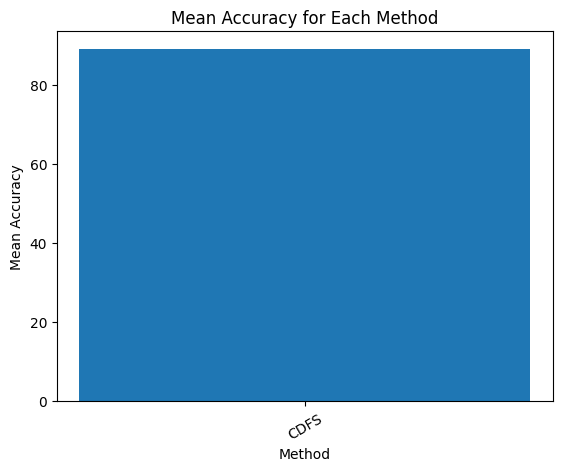

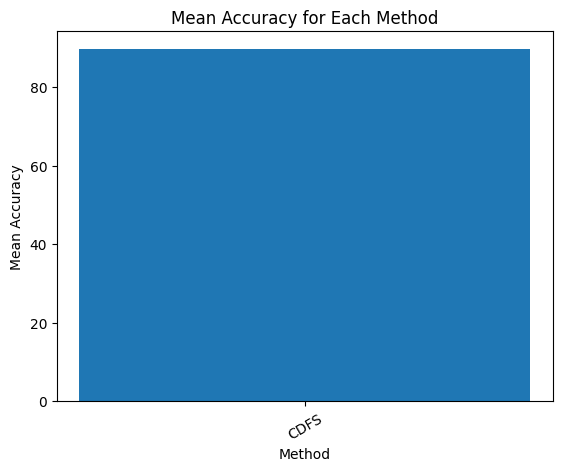

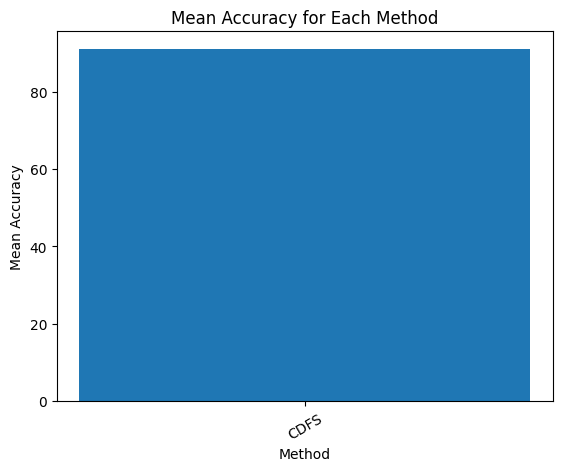

In [10]:
plt.bar(gin_acc['method'], gin_acc['balanced_accuracy'])
plt.xlabel('Method')
plt.ylabel('Mean Accuracy')
plt.xticks(rotation = 30)
plt.title('Mean Accuracy for Each Method')
plt.show()

plt.bar(ginjk_acc['method'], ginjk_acc['balanced_accuracy'])
plt.xlabel('Method')
plt.ylabel('Mean Accuracy')
plt.xticks(rotation = 30)
plt.title('Mean Accuracy for Each Method')
plt.show()

plt.bar(wl_acc['method'], wl_acc['balanced_accuracy'])
plt.xlabel('Method')
plt.ylabel('Mean Accuracy')
plt.xticks(rotation = 30)
plt.title('Mean Accuracy for Each Method')
plt.show()

In [11]:
df = df_original.loc[(df_original["classifier"] == "ginjk") or (df_original["classifier"] == "wl")]
metrics = ["accuracy","balanced_accuracy","precision","recall","f1_score"]
for met in metrics:
    grouped_data = df.groupby(['method', 'num_layers'])[met].mean().unstack()
    # gin_df.groupby(['method', 'num_layers'])[metrics[1]].mean().reset_index()

    # Get the method and num_layers labels
    methods = grouped_data.columns
    num_layers = grouped_data.index

    # Create the figure and axes
    fig, ax = plt.subplots()

    # Set the width of each bar
    bar_width = 0.15

    # Set the position of each bar on the x-axis
    positions = np.arange(len(num_layers))

    # Plot the bars for each method
#     plt.figure(figsize=(16,8))
    plt.grid(axis='y', linestyle="dashed", zorder=0)
    for i, method in enumerate(methods):
        ax.bar(positions + i * bar_width, grouped_data[method], width=bar_width, zorder=3, label=method, color=colors[i],edgecolor='white')

    # Set the x-axis labels and title
    ax.set_xticks(positions + bar_width * (len(methods) - 1) / 2)
    ax.set_xticklabels(num_layers)
    plt.xticks(rotation = 30)
    ax.set_xlabel('Number of Layers')
    ax.set_ylabel(f'Mean {met}')
    ax.set_title(f'Mean {met} for GIN(2-3-4-5) and WL(0)')

    # Add a legend
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.savefig(f"Mean_{met}_for_GIN_WL.png", bbox_inches = 'tight')

    # Show the plot
    plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
df = df_original.loc[(df_original["classifier"] == "gin") or (df_original["classifier"] == "wl")]
metrics = ["accuracy","balanced_accuracy","precision","recall","f1_score"]
for met in metrics:
    grouped_data = df.groupby(['method', 'num_layers'])[met].mean().unstack()
    # gin_df.groupby(['method', 'num_layers'])[metrics[1]].mean().reset_index()

    # Get the method and num_layers labels
    methods = grouped_data.columns
    num_layers = grouped_data.index

    # Create the figure and axes
    fig, ax = plt.subplots()

    # Set the width of each bar
    bar_width = 0.15

    # Set the position of each bar on the x-axis
    positions = np.arange(len(num_layers))
    
    plt.grid(axis='y', linestyle="dashed", zorder=0)
    # Plot the bars for each method
    for i, method in enumerate(methods):
        ax.bar(positions + i * bar_width, grouped_data[method], width=bar_width, zorder=3, label=method, color=colors[i],edgecolor='white')

    # Set the x-axis labels and title
    ax.set_xticks(positions + bar_width * (len(methods) - 1) / 2)
    ax.set_xticklabels(num_layers)
    plt.xticks(rotation = 30)
    ax.set_xlabel('Number of Layers')
    ax.set_ylabel(f'Mean {met}')
    ax.set_title(f'Mean {met} for GINJK(2-3-4-5) and WL(0)')
    
    

    # Add a legend
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.savefig(f"Mean_{met}_for_GINJK_WL.png", bbox_inches = 'tight')

    # Show the plot
    plt.show()

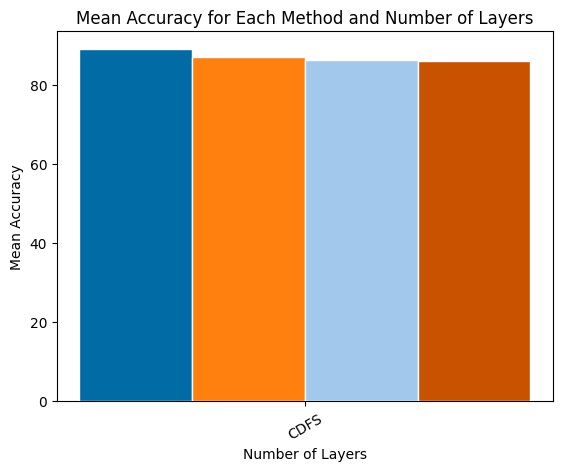

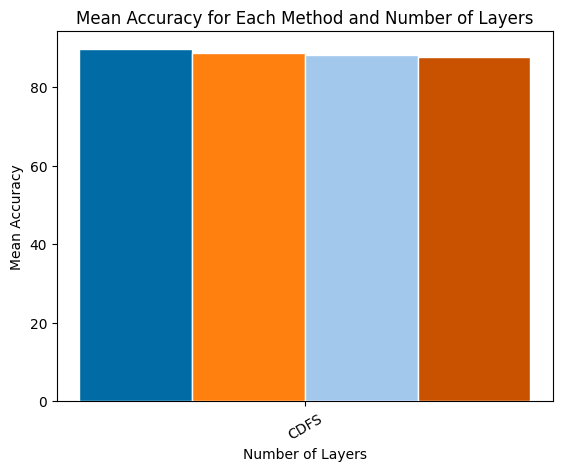

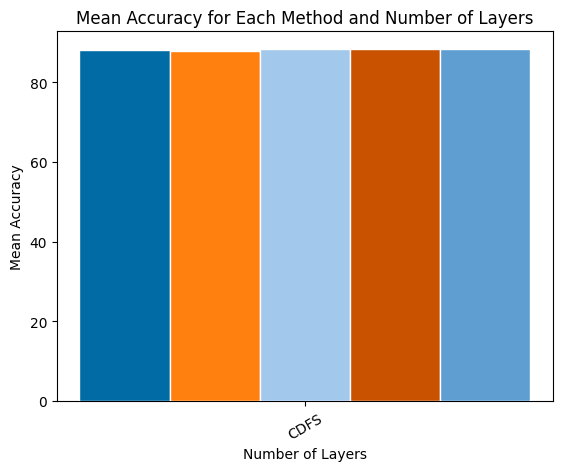

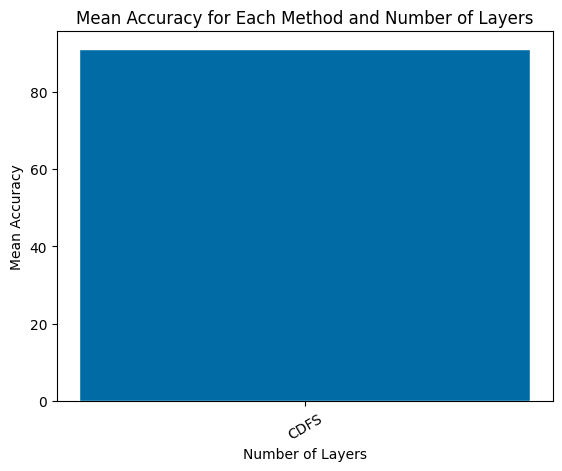

In [12]:
for df in [gin_df, ginjk_df, rginjk_df, wl_df]:
    grouped_data = df.groupby(['method', 'num_layers'])['balanced_accuracy'].mean().unstack()
    # gin_df.groupby(['method', 'num_layers'])[metrics[1]].mean().reset_index()

    # Get the method and num_layers labels
    methods = grouped_data.columns
    num_layers = grouped_data.index

    # Create the figure and axes
    fig, ax = plt.subplots()

    # Set the width of each bar
    bar_width = 0.2

    # Set the position of each bar on the x-axis
    positions = np.arange(len(num_layers))

    # Plot the bars for each method
    for i, method in enumerate(methods):
        ax.bar(positions + i * bar_width, grouped_data[method], width=bar_width, zorder=3, label=method, color=colors[i],edgecolor='white')

    # Set the x-axis labels and title
    ax.set_xticks(positions + bar_width * (len(methods) - 1) / 2)
    ax.set_xticklabels(num_layers)
    plt.xticks(rotation = 30)
    ax.set_xlabel('Number of Layers')
    ax.set_ylabel('Mean Accuracy')
    ax.set_title('Mean Accuracy for Each Method and Number of Layers')

    # Add a legend
    # ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Show the plot
    plt.show()

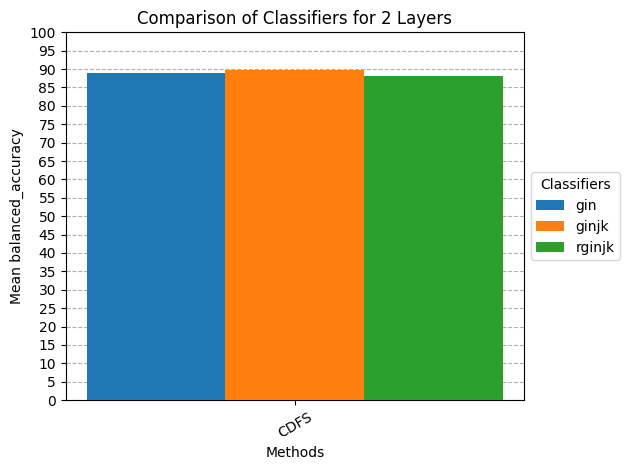

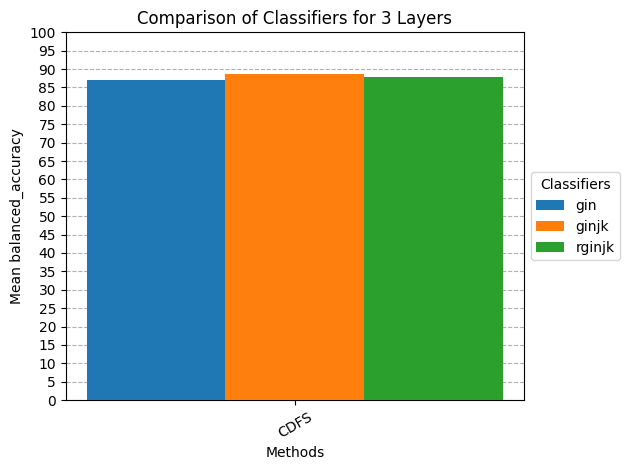

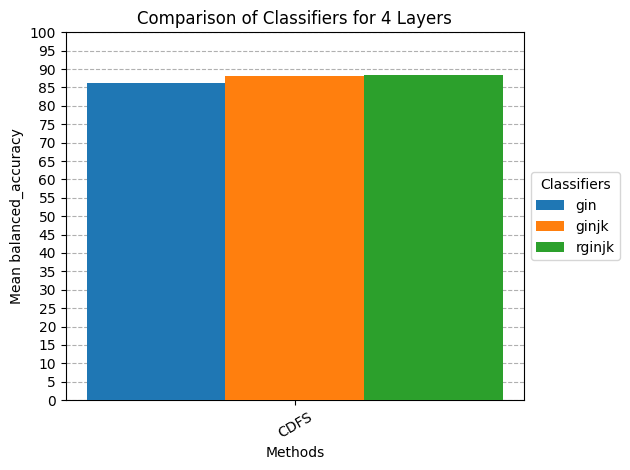

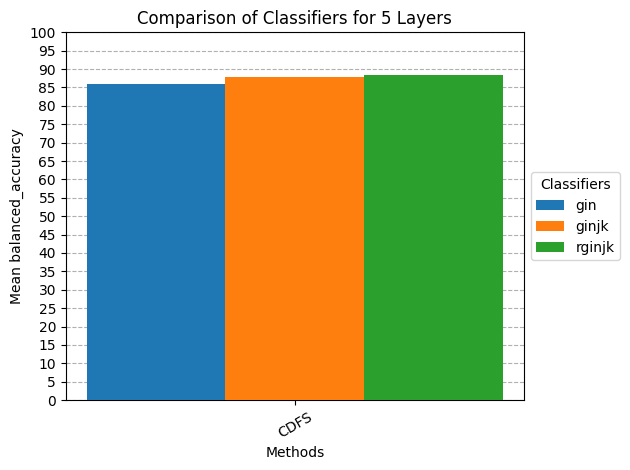

In [43]:
classifiers = ['gin', 'ginjk', 'rginjk']
data = df_original[df_original['classifier'].isin(classifiers)]

# Group the data by method, num_layers, and classifier and calculate the mean accuracy
grouped_data = data.groupby(['method', 'num_layers', 'classifier'])['balanced_accuracy'].mean().unstack()

# Get the method and num_layers labels
methods = grouped_data.index.get_level_values('method').unique()
num_layers = [2, 3, 4, 5] # grouped_data.index.get_level_values('num_layers').unique()

# Set the number of classifiers and bar width
num_classifiers = len(classifiers)
bar_width = 0.2

# Set the position of each bar on the x-axis
positions = np.arange(len(methods))

# Create subplots for each num_layers
# fig, axs = plt.subplots(len(num_layers), 1, figsize=(8, 10))

# Iterate over each num_layers
for i, layer in enumerate(num_layers):
    # plt.figure(figsize=(16,8))
    plt.grid(axis='y', linestyle="dashed", zorder=0)
    # Get the accuracies for the current num_layers
    accuracies = grouped_data.loc[(slice(None), layer), :]

    # Set the x-axis position for each group of bars
    x = positions - (num_classifiers - 1) * bar_width / 2

    # Plot the bars for each classifier
    for j, classifier in enumerate(classifiers):
        plt.bar(x, accuracies[classifier], width=bar_width, zorder=3, label=classifier)
        x += bar_width

    # Set the x-axis labels, title, and legend for each subplot
#     axs[i].set_xticks(positions)
#     axs[i].set_xticklabels(methods, rotation = 30)
#     axs[i].set_xlabel('Methods')
#     axs[i].set_ylabel('Mean balanced_accuracy')
#     axs[i].set_title(f'Comparison of Classifiers for {layer} Layers')
#     axs[i].legend(title='Classifiers', loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(positions, methods, rotation = 30)
#     plt.xticklabels(methods, rotation = 30)
    plt.yticks(np.arange(0, 101, 5)) 
    plt.xlabel('Methods')
    plt.ylabel('Mean balanced_accuracy')
    plt.title(f'Comparison of Classifiers for {layer} Layers')
    plt.legend(title='Classifiers', loc='center left', bbox_to_anchor=(1, 0.5))

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

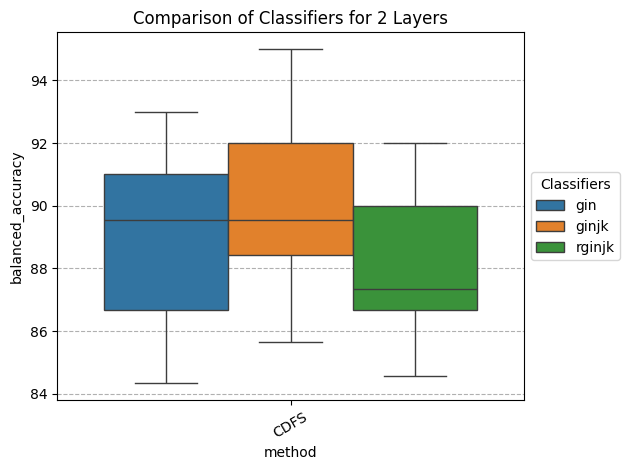

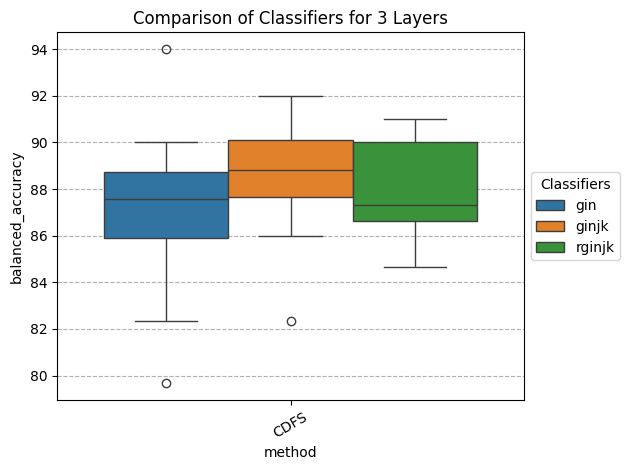

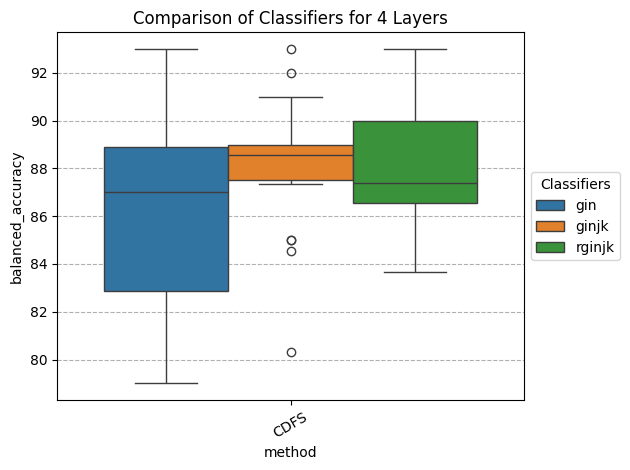

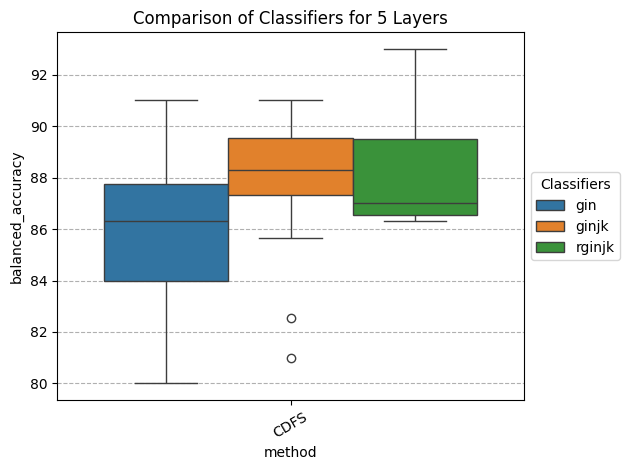

In [36]:
classifiers = ['gin', 'ginjk', 'rginjk']
data = df_original[df_original['classifier'].isin(classifiers)]

# Group the data by method, num_layers, and classifier and calculate the mean accuracy
# grouped_data = data.groupby(['method', 'num_layers', 'classifier'])

grouped_data = df_original.loc[df_original["classifier"]!= "wl"]

# Get the method and num_layers labels
# methods = grouped_data.index.get_level_values('method').unique()
num_layers = [2, 3, 4, 5] # grouped_data.index.get_level_values('num_layers').unique()

# Set the number of classifiers and bar width
num_classifiers = len(classifiers)

# Set the position of each bar on the x-axis
positions = np.arange(len(methods))

# Create subplots for each num_layers
# fig, axs = plt.subplots(len(num_layers), 1, figsize=(8, 10))

# Iterate over each num_layers
for i, layer in enumerate(num_layers):
    # plt.figure(figsize=(16,8))
    plt.grid(axis='y', linestyle="dashed", zorder=0)    
    sns.boxplot(x=grouped_data['method'], y=grouped_data.loc[grouped_data['num_layers']==layer]['balanced_accuracy'], hue=grouped_data['classifier'], zorder=3)

# Adjust the spacing between subplots
    plt.title(f'Comparison of Classifiers for {layer} Layers')
    plt.legend(title='Classifiers', loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation = 30)
    plt.tight_layout()
    plt.savefig(f"comp_layer_{layer}.png", bbox_inches = 'tight')

    # Show the plot
    plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

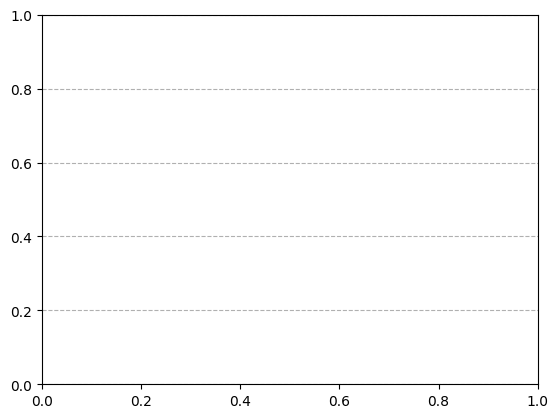

In [40]:
classifiers = ['gin', 'ginjk', 'rginjk']
data = df_original[df_original['classifier'].isin(classifiers)]

# Group the data by method, num_layers, and classifier and calculate the mean accuracy
# grouped_data = data.groupby(['method', 'num_layers', 'classifier'])

grouped_data = df_original.loc[df_original["classifier"]!= "wl"]

# Get the method and num_layers labels
# methods = grouped_data.index.get_level_values('method').unique()
num_layers = [2, 3, 4, 5] # grouped_data.index.get_level_values('num_layers').unique()

# Set the number of classifiers and bar width
num_classifiers = len(classifiers)

# Set the position of each bar on the x-axis
positions = np.arange(len(methods))

# Create subplots for each num_layers
# fig, axs = plt.subplots(len(num_layers), 1, figsize=(8, 10))

# Iterate over each num_layers
for s in ["split_0", "split_1", "split_2", "split_3", "split_4"]:
    for i, layer in enumerate(num_layers):
        # plt.figure(figsize=(16,8))
        plt.grid(axis='y', linestyle="dashed", zorder=0)    
        sns.boxplot(x=grouped_data['method'], y=grouped_data.loc[(grouped_data['num_layers']==layer) and (grouped_data['split']==s)]['f1_score'], hue=grouped_data['classifier'], zorder=3)
    
    # Adjust the spacing between subplots
        plt.title(f'Comparison of Classifiers for {layer} Layers')
        plt.legend(title='Classifiers', loc='center left', bbox_to_anchor=(1, 0.5))
        plt.xticks(rotation = 30)
        plt.tight_layout()
        plt.savefig(f"comp_layer_{layer}.png", bbox_inches = 'tight')
    
        # Show the plot
        plt.show()

In [15]:
for i in range(3):
    print(f"      {i}       | ", end='')
print()
for j in range(3):
    print("2 | 3 | 4 | 5 | ", end='')
print()    
for _ in range(9):
    for j in range(3):
        print("v | v | v | v | ", end='')
    print()
    
for m in methods:
    print(f"{m} & ", end='')

      0       |       1       |       2       | 
2 | 3 | 4 | 5 | 2 | 3 | 4 | 5 | 2 | 3 | 4 | 5 | 
v | v | v | v | v | v | v | v | v | v | v | v | 
v | v | v | v | v | v | v | v | v | v | v | v | 
v | v | v | v | v | v | v | v | v | v | v | v | 
v | v | v | v | v | v | v | v | v | v | v | v | 
v | v | v | v | v | v | v | v | v | v | v | v | 
v | v | v | v | v | v | v | v | v | v | v | v | 
v | v | v | v | v | v | v | v | v | v | v | v | 
v | v | v | v | v | v | v | v | v | v | v | v | 
v | v | v | v | v | v | v | v | v | v | v | v | 
CDFS & 

In [16]:
# Define the table data
table_data = [
    ["", "0", "gin", "", "", "ginjk", "", ""],
    ["WSELECT", "v", "v", "v", "v", "v", "v", "v", "v"],
    ["WSELECT2", "v", "v", "v", "v", "v", "v", "v", "v"],
    ["WSELECTSET2", "v", "v", "v", "v", "v", "v", "v", "v"],
    ["CDFS", "v", "v", "v", "v", "v", "v", "v", "v"],
    ["CBFS", "v", "v", "v", "v", "v", "v", "v", "v"],
    ["CSTOCH", "v", "v", "v", "v", "v", "v", "v", "v"],
    ["CSTOCH2", "v", "v", "v", "v", "v", "v", "v", "v"],
    ["CSTOCHSET2", "v", "v", "v", "v", "v", "v", "v", "v"],
    ["STOCH", "v", "v", "v", "v", "v", "v", "v", "v"],
]

# Generate the LaTeX table
latex_table = "\\begin{tabular}{|c|c|c|c|c|c|c|c|c|}\n"
latex_table += "\\hline\n"
latex_table += " & 0 & \multicolumn{2}{c|}{gin} & \multicolumn{2}{c|}{ginjk} \\\\\n"
latex_table += "\\cline{3-8}\n"
latex_table += " &  & 2 & 3 &  & 2 & 3 \\\\\n"
latex_table += "\\hline\n"
for row in table_data[1:]:
    latex_table += row[0] + " & " + " & ".join(row[1:]) + " \\\\\n"
    latex_table += "\\hline\n"
latex_table += "\\end{tabular}"

# Print the LaTeX table
print(latex_table)


\begin{tabular}{|c|c|c|c|c|c|c|c|c|}
\hline
 & 0 & \multicolumn{2}{c|}{gin} & \multicolumn{2}{c|}{ginjk} \\
\cline{3-8}
 &  & 2 & 3 &  & 2 & 3 \\
\hline
WSELECT & v & v & v & v & v & v & v & v \\
\hline
WSELECT2 & v & v & v & v & v & v & v & v \\
\hline
WSELECTSET2 & v & v & v & v & v & v & v & v \\
\hline
CDFS & v & v & v & v & v & v & v & v \\
\hline
CBFS & v & v & v & v & v & v & v & v \\
\hline
CSTOCH & v & v & v & v & v & v & v & v \\
\hline
CSTOCH2 & v & v & v & v & v & v & v & v \\
\hline
CSTOCHSET2 & v & v & v & v & v & v & v & v \\
\hline
STOCH & v & v & v & v & v & v & v & v \\
\hline
\end{tabular}


In [17]:
gin_df = df_original.loc[df_original["classifier"]== "gin"]
ginjk_df = df_original.loc[df_original["classifier"]== "ginjk"]
rginjk_df = df_original.loc[df_original["classifier"]== "rginjk"]
wl_df = df_original.loc[df_original["classifier"]== "wl"]

In [18]:
gin_acc = gin_df.groupby(['method', 'num_layers'])["balanced_accuracy"].mean().reset_index()
ginjk_acc = ginjk_df.groupby(['method', 'num_layers'])["balanced_accuracy"].mean().reset_index()
rginjk_acc = rginjk_df.groupby(['method', 'num_layers'])["balanced_accuracy"].mean().reset_index()
wl_acc = wl_df.groupby(['method', 'num_layers'])["balanced_accuracy"].mean().reset_index()

In [19]:
d = {}
for me in methods:
    d[me] = []
for index, row in wl_acc.iterrows():
    print(f"{row['method']}  & {row['balanced_accuracy']:.3f}")
    d[row['method']].append(row['balanced_accuracy'])

CDFS  & 90.978


In [20]:


for n in [2,3,4,5]:
    print(f"------ {n} -------")
    for index, row in gin_acc.loc[gin_acc['num_layers']==n].iterrows():
        d[row['method']].append(row['balanced_accuracy'])
#         print(f"{row['method']} & {row['balanced_accuracy']:.3f}")
for n in [2,3,4,5]:
    print(f"------ {n} -------")
    for index, row in ginjk_acc.loc[gin_acc['num_layers']==n].iterrows():
        d[row['method']].append(row['balanced_accuracy'])
#         print(f"{row['method']} & {row['balanced_accuracy']:.3f}")
print(d)

------ 2 -------
------ 3 -------
------ 4 -------
------ 5 -------
------ 2 -------
------ 3 -------
------ 4 -------
------ 5 -------
{'CDFS': [90.97777777777777, 88.99555555555554, 87.11111111111111, 86.33888888888889, 85.86666666666666, 89.69444444444444, 88.66111111111111, 88.08888888888889, 87.80555555555557]}


In [21]:
for k in d:
    print(k, end=" & ")
    for v in d[k]:
        print(f"{v:.3f} & ", end='')
    print()

CDFS & 90.978 & 88.996 & 87.111 & 86.339 & 85.867 & 89.694 & 88.661 & 88.089 & 87.806 & 


In [22]:
print(gin_df.groupby(['num_layers', 'method'])[metrics[1]].std())
print(ginjk_df.groupby(['num_layers', 'method'])[metrics[1]].std())
print(wl_df.groupby(['num_layers', 'method'])[metrics[1]].std())

num_layers  method
2.0         CDFS      2.368883
3.0         CDFS      3.069267
4.0         CDFS      3.952360
5.0         CDFS      2.927009
Name: balanced_accuracy, dtype: float64
num_layers  method
2.0         CDFS      2.605426
3.0         CDFS      2.285780
4.0         CDFS      2.786209
5.0         CDFS      2.457931
Name: balanced_accuracy, dtype: float64
num_layers  method
0.0         CDFS      2.289806
Name: balanced_accuracy, dtype: float64


In [35]:
print(gin_df.groupby(['num_layers', 'method'])[metrics[-1]].mean())
print(ginjk_df.groupby(['num_layers', 'method'])[metrics[-1]].mean())
print(rginjk_df.groupby(['num_layers', 'method'])[metrics[-1]].mean())
print(wl_df.groupby(['num_layers', 'method'])[metrics[-1]].mean())

num_layers  method
2.0         CDFS      88.426048
3.0         CDFS      86.581048
4.0         CDFS      85.686637
5.0         CDFS      85.201395
Name: f1_score, dtype: float64
num_layers  method
2.0         CDFS      89.211759
3.0         CDFS      88.293620
4.0         CDFS      87.629240
5.0         CDFS      87.402289
Name: f1_score, dtype: float64
num_layers  method
2.0         CDFS      87.338857
3.0         CDFS      87.118780
4.0         CDFS      87.669060
5.0         CDFS      87.429432
6.0         CDFS      87.616046
Name: f1_score, dtype: float64
num_layers  method
0.0         CDFS      90.94932
Name: f1_score, dtype: float64


In [23]:
print(df_original.groupby(['classifier','num_layers', 'method'])[metrics[1]].mean())

classifier  num_layers  method
gin         2.0         CDFS      88.995556
            3.0         CDFS      87.111111
            4.0         CDFS      86.338889
            5.0         CDFS      85.866667
ginjk       2.0         CDFS      89.694444
            3.0         CDFS      88.661111
            4.0         CDFS      88.088889
            5.0         CDFS      87.805556
rginjk      2.0         CDFS      88.061111
            3.0         CDFS      87.911111
            4.0         CDFS      88.366667
            5.0         CDFS      88.266667
            6.0         CDFS      88.311111
wl          0.0         CDFS      90.977778
Name: balanced_accuracy, dtype: float64


In [24]:
print(df_original.groupby(['classifier','num_layers', 'method'])[metrics[1]].std())

classifier  num_layers  method
gin         2.0         CDFS      2.368883
            3.0         CDFS      3.069267
            4.0         CDFS      3.952360
            5.0         CDFS      2.927009
ginjk       2.0         CDFS      2.605426
            3.0         CDFS      2.285780
            4.0         CDFS      2.786209
            5.0         CDFS      2.457931
rginjk      2.0         CDFS      2.054006
            3.0         CDFS      1.915906
            4.0         CDFS      2.671803
            5.0         CDFS      2.263477
            6.0         CDFS      2.420295
wl          0.0         CDFS      2.289806
Name: balanced_accuracy, dtype: float64


In [52]:
print(rginjk_df.groupby(['classifier','split', 'num_layers'])[metrics[-1]].std())

classifier  split    num_layers
rginjk      split_0  2.0           1.371019
                     3.0           0.988938
                     4.0           1.946824
                     5.0           1.063274
                     6.0           2.175882
            split_1  2.0           1.042599
                     3.0           0.902863
                     4.0           0.527622
                     5.0           0.091716
                     6.0           0.090908
            split_2  2.0           1.239179
                     3.0           1.677562
                     4.0           0.139519
                     5.0           2.514158
                     6.0           0.799810
            split_3  2.0           1.070577
                     3.0           0.438596
                     4.0           1.515849
                     5.0           0.713411
                     6.0           1.410564
            split_4  2.0           0.028808
                     3.0           0.836892


In [53]:
print(ginjk_df.groupby(['classifier','split', 'num_layers'])[metrics[-1]].std())

classifier  split    num_layers
ginjk       split_0  2.0           1.388781
                     3.0           0.977022
                     4.0           3.770028
                     5.0           5.124709
            split_1  2.0           0.432197
                     3.0           1.647976
                     4.0           0.439976
                     5.0           3.693255
            split_2  2.0           1.863076
                     3.0           1.758075
                     4.0           0.758766
                     5.0           0.863174
            split_3  2.0           0.566354
                     3.0           3.804027
                     4.0           3.871062
                     5.0           0.001279
            split_4  2.0           0.660752
                     3.0           0.618299
                     4.0           2.065837
                     5.0           1.449123
Name: f1_score, dtype: float64


In [55]:
rginjk_df1 = df_original1.loc[df_original1["classifier"]== "rginjk"]
wl_df1 = df_original1.loc[df_original1["classifier"]== "wl"]

In [68]:
print(rginjk_df1.groupby(['classifier','split', 'num_layers'])[metrics[1]].mean())
print(wl_df1.groupby(['classifier','split', 'num_layers'])[metrics[1]].mean())

classifier  split    num_layers
rginjk      split_0  2             91.000000
                     3             90.250000
                     4             92.000000
                     5             92.000000
                     6             91.750000
            split_1  2             85.805556
                     3             86.555556
                     4             86.305556
                     5             86.555556
                     6             86.555556
            split_2  2             89.000000
                     3             89.500000
                     4             90.000000
                     5             89.250000
                     6             90.000000
            split_3  2             87.833333
                     3             87.083333
                     4             88.111111
                     5             86.861111
                     6             86.583333
            split_4  2             86.666667
                     3 

In [69]:
print(rginjk_df1.groupby(['classifier','split', 'num_layers'])[metrics[-1]].mean())
print(wl_df1.groupby(['classifier','split', 'num_layers'])[metrics[-1]].mean())

classifier  split    num_layers
rginjk      split_0  2             90.225981
                     3             89.029833
                     4             91.244792
                     5             91.324884
                     6             91.099320
            split_1  2             85.559031
                     3             86.349170
                     4             86.056827
                     5             86.425414
                     6             86.345595
            split_2  2             88.339738
                     3             88.811404
                     4             89.162281
                     5             87.750119
                     6             89.262322
            split_3  2             87.169521
                     3             86.415788
                     4             87.546308
                     5             86.200791
                     6             85.929804
            split_4  2             85.400012
                     3 

In [65]:
print(ginjk_df.groupby(['classifier','num_layers'])[metrics[-1]].mean())
print(rginjk_df1.groupby(['classifier','num_layers'])[metrics[-1]].mean())
print(wl_df1.groupby(['classifier','num_layers'])[metrics[-1]].mean())
print(wl_df.groupby(['classifier','num_layers'])[metrics[-1]].mean())

classifier  num_layers
ginjk       2.0           89.211759
            3.0           88.293620
            4.0           87.629240
            5.0           87.402289
Name: f1_score, dtype: float64
classifier  num_layers
rginjk      2             87.338857
            3             87.118780
            4             87.669060
            5             87.429432
            6             87.616046
Name: f1_score, dtype: float64
classifier  num_layers
wl          0             88.014819
Name: f1_score, dtype: float64
classifier  num_layers
wl          0.0           90.94932
Name: f1_score, dtype: float64


In [66]:
print(ginjk_df.groupby(['classifier','num_layers'])[metrics[1]].mean())
print(rginjk_df1.groupby(['classifier','num_layers'])[metrics[1]].mean())
print(wl_df1.groupby(['classifier','num_layers'])[metrics[1]].mean())
print(wl_df.groupby(['classifier','num_layers'])[metrics[1]].mean())

classifier  num_layers
ginjk       2.0           89.694444
            3.0           88.661111
            4.0           88.088889
            5.0           87.805556
Name: balanced_accuracy, dtype: float64
classifier  num_layers
rginjk      2             88.061111
            3             87.911111
            4             88.366667
            5             88.266667
            6             88.311111
Name: balanced_accuracy, dtype: float64
classifier  num_layers
wl          0             88.911111
Name: balanced_accuracy, dtype: float64
classifier  num_layers
wl          0.0           90.977778
Name: balanced_accuracy, dtype: float64
